In [1]:
import matplotlib
%matplotlib inline
import pandas as pd

# Inspecting EPA CompTox identifier mappings

The goal of this notebook is to understand what to expect when integrating external identifier mappings provided by EPA into the database.

## Inspect DTXSID:CASRN mappings

In [2]:
dtx_cas = pd.read_excel('/opt/akokai/data/EPA/Dsstox_CAS_number_name.xlsx')
cas_cols = ['casrn', 'dtxsid', 'name']
dtx_cas.columns = cas_cols
print(len(dtx_cas), 'DTXSID:CASRN mappings')

753398 DTXSID:CASRN mappings


In [3]:
dtx_cas.head(10)

,casrn,dtxsid,name
0,26148-68-5,DTXSID7020001,A-alpha-C
1,107-29-9,DTXSID2020004,Acetaldehyde oxime
2,60-35-5,DTXSID7020005,Acetamide
3,103-90-2,DTXSID2020006,Acetaminophen
4,968-81-0,DTXSID7020007,Acetohexamide
5,18523-69-8,DTXSID2020008,Acetone[4-(5-nitro-2-furyl)-2-thiazolyl] hydra...
6,75-05-8,DTXSID7020009,Acetonitrile
7,127-06-0,DTXSID6020010,Acetoxime
8,65734-38-5,DTXSID6020012,N'-Acetyl-4-(hydroxymethyl) phenylhydrazine
9,1078-38-2,DTXSID1020013,1-Acetyl-2-isonicotinoylhydrazine


### Check to see how many are unique, 1:1 mappings

**Conclusion:** The DTXSID:CASRN mappings are all unique. It's interesting that there are more of these mappings than there are molecular structures (e.g., DTXSID:InChI) in the whole CompTox dataset.

1    753398
Name: dtxsid, dtype: int64


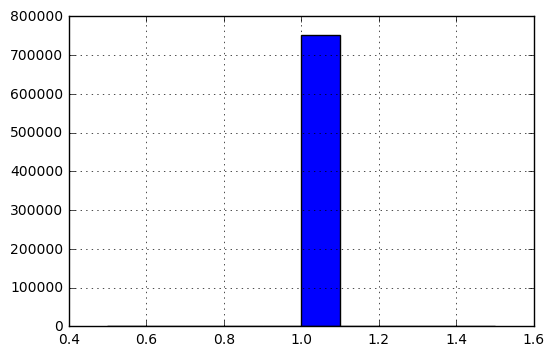

In [4]:
f_dtx = dtx_cas.groupby('casrn')['dtxsid'].count()
print(f_dtx.value_counts())
f_dtx.hist()

1    753398
Name: casrn, dtype: int64


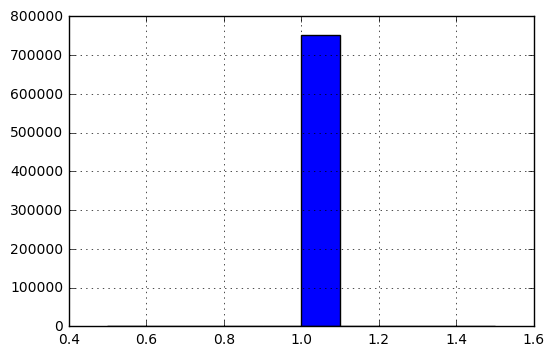

In [5]:
f_cas = dtx_cas.groupby('dtxsid')['casrn'].count()
print(f_cas.value_counts())
f_cas.hist()

## Inspect DTXSID:PubChem CID mappings

In [6]:
dtx_cid = pd.read_table('/opt/akokai/data/EPA/PubChem_DTXSID_mapping_file.txt',
                        dtype=str, low_memory=True)
dtx_cid.columns = ['sid', 'cid', 'dtxsid']
print(len(dtx_cid), 'DTXSID:CID mappings')

735563 DTXSID:CID mappings


In [7]:
dtx_cid.head(10)

,sid,cid,dtxsid
0,316388891,20404,DTXSID30873143
1,316388890,10142816,DTXSID70873142
2,316388889,50742127,DTXSID40873139
3,316388888,19073841,DTXSID20873137
4,316388887,11505215,DTXSID00873135
5,316388886,25021861,DTXSID80873133
6,316388885,2784427,DTXSID60873131
7,316388884,6731,DTXSID00873130
8,316388883,121233001,DTXSID90873129
9,316388882,414251,DTXSID70873127


In [8]:
print('{0} unique DTXSIDs\n{1} unique CIDs'.format(len(dtx_cid['dtxsid'].drop_duplicates()), 
                                                   len(dtx_cid['cid'].drop_duplicates())))

735563 unique DTXSIDs
718413 unique CIDs


### Check to see how many are 1:1 mappings

**Conclusions:**
- There are mostly unique DTXSID:CID mappings.
- Each DTXSID is associated with only one CID.
- However, those associations are not all unique. Some DTXSIDs share the same CID (n:1).
- Bottom line: As expected with DTXSID being EPS's internal unique ID, it's safe to join tables on DTXSID.

1       711348
2         4065
3         1456
4          640
5          345
6          213
7          135
8           52
9           38
10          28
11          16
13          14
14           8
12           7
15           6
16           6
23           5
18           4
20           4
21           4
22           2
27           2
116          1
40           1
59           1
50           1
47           1
45           1
44           1
31           1
36           1
17           1
30           1
28           1
26           1
24           1
2389         1
Name: dtxsid, dtype: int64


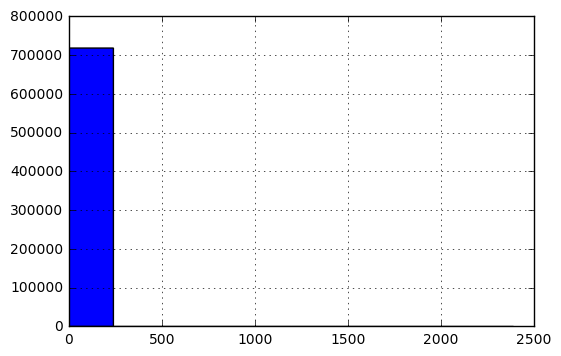

In [9]:
f_dtx2 = dtx_cid.groupby('cid')['dtxsid'].count()
print(f_dtx2.value_counts())
f_dtx2.hist()

1    735563
Name: cid, dtype: int64


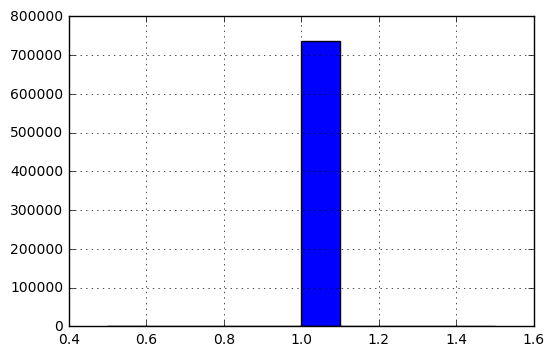

In [10]:
f_cid = dtx_cid.groupby('dtxsid')['cid'].count()
print(f_cid.value_counts())
f_cid.hist()